In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
efy = pd.read_csv("efy_tracks.csv")

In [51]:
efy

,Title,Artist1,Artist2,Artist3,Artist4,Artist5,Artist6,Artist7,Artist8,Artist9,...,Music4,Arrangement1,Arrangement2,Arrangement3,Album,Year,TrackNum,TotalTracks,YouTube,Length
0,Lovin’ Life,Kenneth Cope,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,EFY 1986: Lovin’ Life (1986),1986,1,1,NaN,NaN
1,Sailin’ Home,Michael Webb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Vaughn Johnson,NaN,NaN,EFY 1987: Sailin’ Home (1987),1987,1,10,NaN,NaN
2,Stay Out of Deep Water,Kenneth Cope,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Randy Kartchner,NaN,NaN,EFY 1987: Sailin’ Home (1987),1987,2,10,NaN,NaN
3,Footprints in the Sand,Julie de Azevedo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Randy Thorderson,NaN,NaN,EFY 1987: Sailin’ Home (1987),1987,3,10,NaN,NaN
4,Ups and Downs,Kenneth Cope,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Randy Kartchner,NaN,NaN,EFY 1987: Sailin’ Home (1987),1987,4,10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,Faces,Gabrielle McKeon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,EFY 2019: Trust With All Thine Heart (2019),2019,8,12,https://www.youtube.com/watch?v=q7_ush0maMo,215.0
384,He’ll Never Let You Go,Patch Crowe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,EFY 2019: Trust With All Thine Heart (2019),2019,9,12,https://www.youtube.com/watch?v=_LuUgtyyqs8,270.0
385,Count Me In,Josh Dalley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,EFY 2019: Trust With All Thine Heart (2019),2019,10,12,https://www.youtube.com/watch?v=l96DDM35HbQ,217.0
386,A Missionary’s Prayer,Anna Richey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,EFY 2019: Trust With All Thine Heart (2019),2019,11,12,https://www.youtube.com/watch?v=GT140NtlkSA,235.0


In [6]:
efy_tidy = pd.melt(efy, id_vars = ["Title", "Words1", "Words2", "Words3", "Words4", "Words5", "Music1", "Music2", "Music3", "Music4",
                                   "Arrangement1", "Arrangement2", "Arrangement3", "Album", "Year",
                                   "TrackNum", "TotalTracks", "YouTube", "Length"], value_name = "Artist")
efy_tidy = efy_tidy.drop("variable", axis = 1)

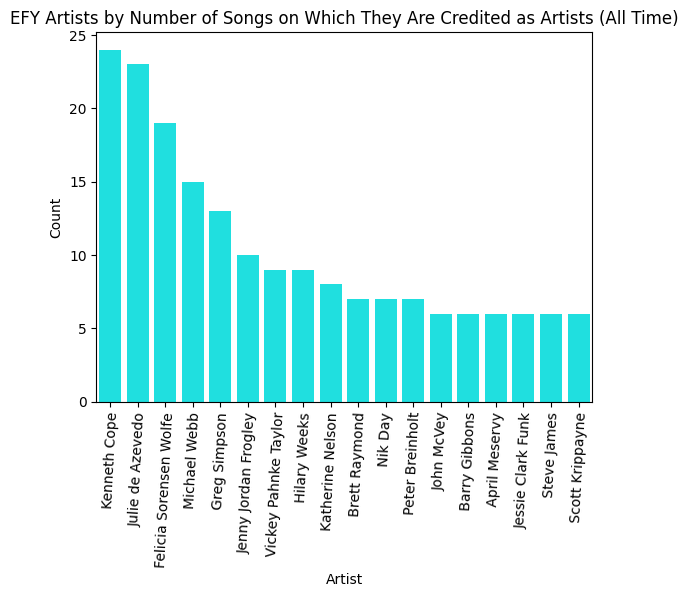

In [7]:
limits = pd.DataFrame(efy_tidy["Artist"].value_counts() > 5).reset_index()
limits = limits[limits["Artist"] == True]["index"]
sns.countplot(data = efy_tidy[efy_tidy["Artist"].isin(limits)], x = "Artist", orient = "v", color = "cyan", order = limits)
plt.xticks(rotation = 87)
plt.ylabel("Count")
plt.title("EFY Artists by Number of Songs on Which They Are Credited as Artists (All Time)");
# Notes:
# Kenneth Cope is the artist who contributed the most, with nearly 25 songs to his name.
# Julie de Azevedo is in second, with maybe one less than Cope.
# Felicia Sorensen Wolfe comes next, just shy of 20 songs.
# Michael Webb is fourth with  15 songs.
# Greg Simpson is fifth highest with about 13 songs.

In [50]:
pd.DataFrame(efy_tidy["Artist"].value_counts()).iloc[5:12, :]

,Artist
Jenny Jordan Frogley,10
Vickey Pahnke Taylor,9
Hilary Weeks,9
Katherine Nelson,8
Brett Raymond,7
Nik Day,7
Peter Breinholt,7


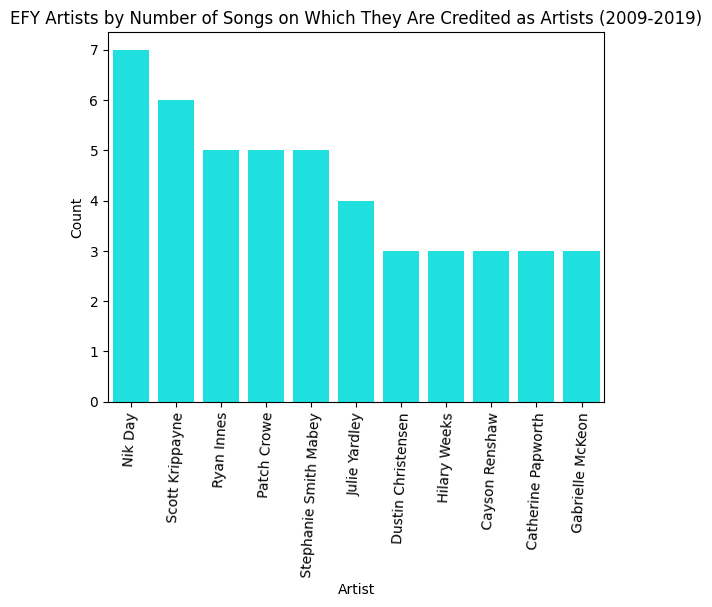

In [8]:
limits = pd.DataFrame(efy_tidy[efy_tidy["Year"] > 2008]["Artist"].value_counts() > 2).reset_index()
limits = limits[limits["Artist"] == True]["index"]
#efy_tidy[efy_tidy["Artist"].isin(limits)]
sns.countplot(data = efy_tidy[(efy_tidy["Artist"].isin(limits)) & (efy_tidy["Year"] > 2008)], x = "Artist", orient = "v", color = "cyan", order = limits)
plt.xticks(rotation = 87)
plt.ylabel("Count")
plt.title("EFY Artists by Number of Songs on Which They Are Credited as Artists (2009-2019)");
# Notes:
# Nik Day leads with 7 songs.
# Scott Krippayne is second with 6 songs.
# Patch Crowe, Stephanie Smith Mabey, and Ryan Innes tie for third with 5 songs each.

In [47]:
efy_tidy[(efy_tidy["Year"] > 2008) & (efy_tidy["Artist"] == "Kenneth Cope")] # Treasure the Truth from 2010


,Title,Words1,Words2,Words3,Words4,Words5,Music1,Music2,Music3,Music4,Arrangement1,Arrangement2,Arrangement3,Album,Year,TrackNum,TotalTracks,YouTube,Length,Artist
272,Treasure the Truth,Kenneth Cope,NaN,NaN,NaN,NaN,Kenneth Cope,NaN,NaN,NaN,Tyler Castleton,NaN,NaN,EFY 2010: Courage to Stand Strong (2010),2010,9,12,https://www.youtube.com/watch?v=ZVsj6-Ayk2k,259.0,Kenneth Cope


In [86]:
efy_tidy_art = pd.DataFrame(efy_tidy["Artist"].value_counts() >= 3).reset_index()

In [9]:
limits = pd.DataFrame(efy_tidy[efy_tidy["Year"] > 2008]["Artist"].value_counts() > 1).reset_index()
limits = limits[limits["Artist"] == True]["index"]

In [78]:
efy_tidy

,Title,Words1,Words2,Words3,Words4,Words5,Music1,Music2,Music3,Music4,Arrangement1,Arrangement2,Arrangement3,Album,Year,TrackNum,TotalTracks,YouTube,Length,Artist
0,Lovin’ Life,Kenneth Cope,NaN,NaN,NaN,NaN,Kenneth Cope,NaN,NaN,NaN,NaN,NaN,NaN,EFY 1986: Lovin’ Life (1986),1986,1,1,NaN,NaN,Kenneth Cope
1,Sailin’ Home,Michael Webb,NaN,NaN,NaN,NaN,Michael Webb,NaN,NaN,NaN,Vaughn Johnson,NaN,NaN,EFY 1987: Sailin’ Home (1987),1987,1,10,NaN,NaN,Michael Webb
2,Stay Out of Deep Water,Kenneth Cope,NaN,NaN,NaN,NaN,Kenneth Cope,NaN,NaN,NaN,Randy Kartchner,NaN,NaN,EFY 1987: Sailin’ Home (1987),1987,2,10,NaN,NaN,Kenneth Cope
3,Footprints in the Sand,Barbara Tanner,Randy Thorderson,NaN,NaN,NaN,Barbara Tanner,Randy Thorderson,NaN,NaN,Randy Thorderson,NaN,NaN,EFY 1987: Sailin’ Home (1987),1987,3,10,NaN,NaN,Julie de Azevedo
4,Ups and Downs,Kenneth Cope,NaN,NaN,NaN,NaN,Kenneth Cope,NaN,NaN,NaN,Randy Kartchner,NaN,NaN,EFY 1987: Sailin’ Home (1987),1987,4,10,NaN,NaN,Kenneth Cope
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4263,Faces,Tyler Castleton,Wayne Burton,NaN,NaN,NaN,Tyler Castleton,Wayne Burton,NaN,NaN,NaN,NaN,NaN,EFY 2019: Trust With All Thine Heart (2019),2019,8,12,https://www.youtube.com/watch?v=q7_ush0maMo,215.0,NaN
4264,He’ll Never Let You Go,Nik Day,NaN,NaN,NaN,NaN,Nik Day,NaN,NaN,NaN,NaN,NaN,NaN,EFY 2019: Trust With All Thine Heart (2019),2019,9,12,https://www.youtube.com/watch?v=_LuUgtyyqs8,270.0,NaN
4265,Count Me In,Tyler Castleton,Wayne Burton,NaN,NaN,NaN,Tyler Castleton,Wayne Burton,NaN,NaN,NaN,NaN,NaN,EFY 2019: Trust With All Thine Heart (2019),2019,10,12,https://www.youtube.com/watch?v=l96DDM35HbQ,217.0,NaN
4266,A Missionary’s Prayer,Tyler Castleton,Wayne Burton,NaN,NaN,NaN,Tyler Castleton,Wayne Burton,NaN,NaN,NaN,NaN,NaN,EFY 2019: Trust With All Thine Heart (2019),2019,11,12,https://www.youtube.com/watch?v=GT140NtlkSA,235.0,NaN


In [10]:
efy_artist_length["Artist"].value_counts()[efy_artist_length["Artist"].value_counts() > 2]

NameError: name 'efy_artist_length' is not defined

In [11]:
efy_tidy = pd.melt(efy, id_vars = ["Title", "Artist1", "Artist2", "Artist3", "Artist4", "Artist5" , "Artist6", "Artist7", "Artist8", "Artist9", "ArtistA" , "ArtistB",
                                   "Music1", "Music2", "Music3", "Music4",
                                     "Arrangement1", "Arrangement2", "Arrangement3", "Album", "Year",
                                     "TrackNum", "TotalTracks", "YouTube", "Length"], value_name = "Words")
efy_tidy = efy_tidy.drop("variable", axis = 1)


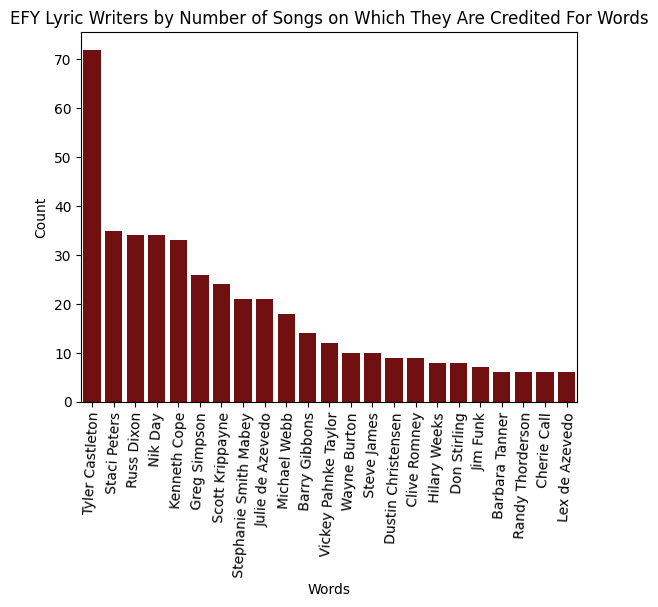

In [12]:
limits = pd.DataFrame(efy_tidy["Words"].value_counts() > 5).reset_index()
limits = limits[limits["Words"] == True]["index"]
sns.countplot(data = efy_tidy[efy_tidy["Words"].isin(limits)], x = "Words", orient = "v", color = "maroon", order = limits)
plt.xticks(rotation = 87)
plt.ylabel("Count")
plt.title("EFY Lyric Writers by Number of Songs on Which They Are Credited For Words");
# Notes:
# Wow, I had heard of Tyler Castleton a bit, but I didn't realize he'd done words to so many songs (over 70).
# Staci Peters, who I'd never heard of before now, came in second with around 35.
# Russ Dixon and Nik Day appear to be tied for third, with Kenneth Cope just behind them.

In [188]:
efy_tidy["Words"].value_counts()

Tyler Castleton        72
Staci Peters           35
Russ Dixon             34
Nik Day                34
Kenneth Cope           33
                       ..
Shawna Edwards          1
John Nicholson          1
Lynda Johnson           1
Mabel Jones Gabbott     1
Tyler Norton            1
Name: Words, Length: 155, dtype: int64

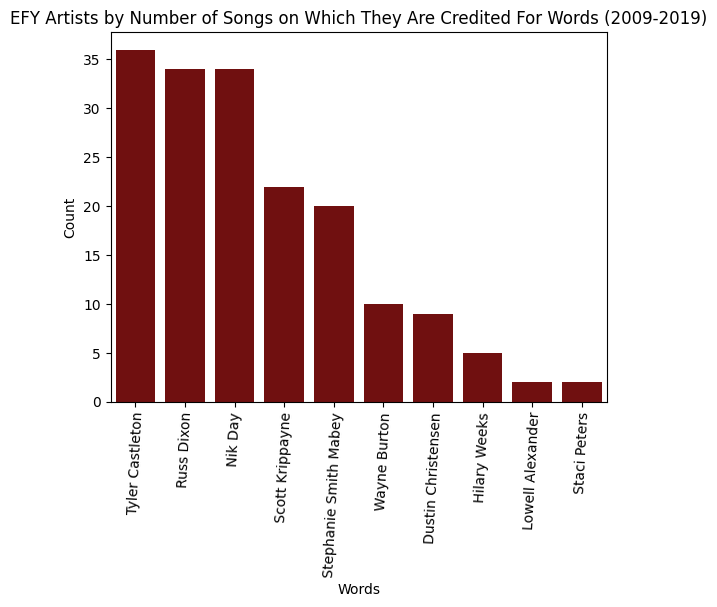

In [13]:
limits = pd.DataFrame(efy_tidy[efy_tidy["Year"] > 2008]["Words"].value_counts() > 1).reset_index()
limits = limits[limits["Words"] == True]["index"]
sns.countplot(data = efy_tidy[(efy_tidy["Words"].isin(limits)) & (efy_tidy["Year"] > 2008)], x = "Words", orient = "v", color = "maroon", order = limits)
plt.xticks(rotation = 87)
plt.ylabel("Count")
plt.title("EFY Artists by Number of Songs on Which They Are Credited For Words (2009-2019)");

In [60]:
efy_tidy[(efy_tidy["Words"].isin(limits)) & (efy_tidy["Year"] > 2008)]["Words"].value_counts()

Tyler Castleton          37
Russ Dixon               34
Nik Day                  34
Scott Krippayne          22
Stephanie Smith Mabey    21
Wayne Burton             10
Dustin Christensen        9
Hilary Weeks              5
Barry Gibbons             3
Staci Peters              3
John Newton               2
Greg Simpson              2
Kenneth Cope              2
Lowell Alexander          2
Jeannine Lasky            2
Name: Words, dtype: int64

In [14]:
efy_tidy = pd.melt(efy, id_vars = ["Title", "Artist1", "Artist2", "Artist3", "Artist4", "Artist5" , "Artist6", "Artist7", "Artist8", "Artist9", "ArtistA" , "ArtistB",
                                        "Words1", "Words2", "Words3", "Words4", "Words5",
                                   "Arrangement1", "Arrangement2", "Arrangement3", "Album", "Year",
                                   "TrackNum", "TotalTracks", "YouTube", "Length"], value_name = "Music")
efy_tidy = efy_tidy.drop("variable", axis = 1)

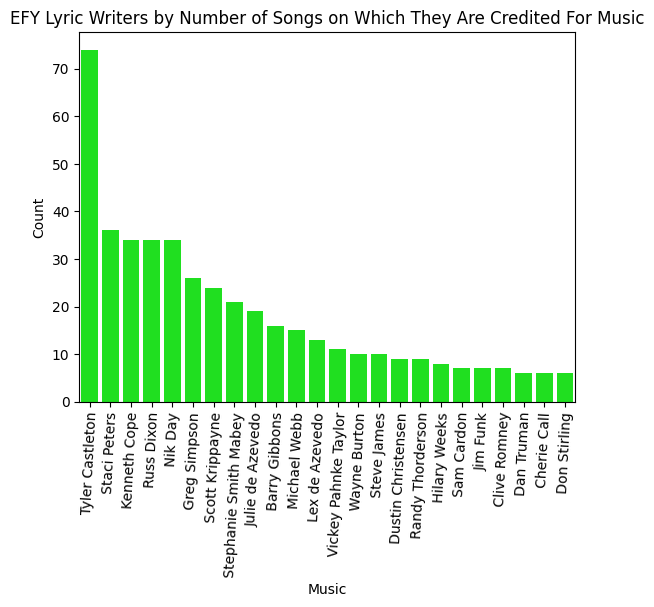

In [15]:
limits = pd.DataFrame(efy_tidy["Music"].value_counts() > 5).reset_index()
limits = limits[limits["Music"] == True]["index"]
sns.countplot(data = efy_tidy[efy_tidy["Music"].isin(limits)], x = "Music", orient = "v", color = "lime", order = limits)
plt.xticks(rotation = 87)
plt.ylabel("Count")
plt.title("EFY Lyric Writers by Number of Songs on Which They Are Credited For Music");
# Notes:
# This chart is near identical to the Music chart - not quite the same, but rankings are pretty close

In [20]:
efy_tidy["Music"].value_counts()

Tyler Castleton     74
Staci Peters        36
Kenneth Cope        34
Russ Dixon          34
Nik Day             34
                    ..
Mark Shultz          1
Harrison Millard     1
Michelle Tumes       1
Jake Rau             1
Tyler Norton         1
Name: Music, Length: 149, dtype: int64

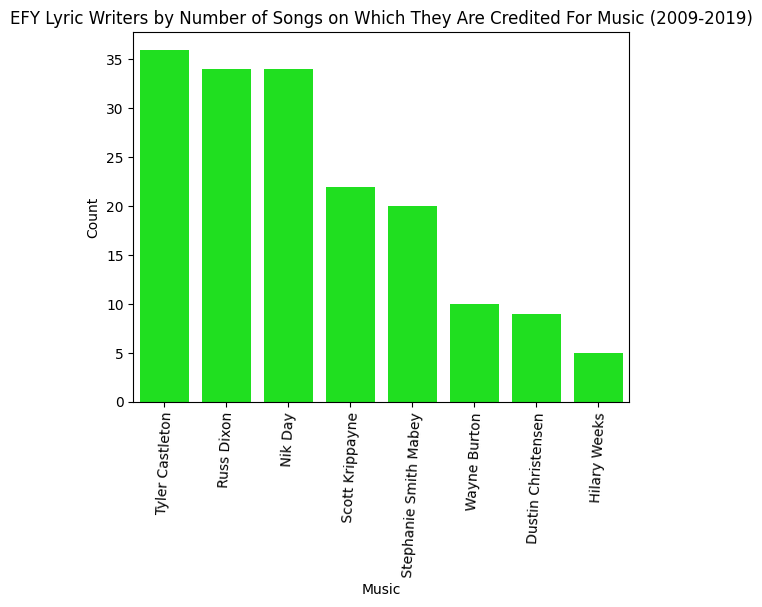

In [16]:
limits = pd.DataFrame(efy_tidy[efy_tidy["Year"] > 2008]["Music"].value_counts() > 2).reset_index()
limits = limits[limits["Music"] == True]["index"]
sns.countplot(data = efy_tidy[(efy_tidy["Music"].isin(limits)) & (efy_tidy["Year"] > 2008)], x = "Music", orient = "v", color = "lime", order = limits)
plt.xticks(rotation = 87)
plt.ylabel("Count")
plt.title("EFY Lyric Writers by Number of Songs on Which They Are Credited For Music (2009-2019)");

In [76]:
efy_tidy[(efy_tidy["Music"].isin(limits)) & (efy_tidy["Year"] > 2008)]["Music"].value_counts()

Tyler Castleton          38
Russ Dixon               34
Nik Day                  34
Scott Krippayne          22
Stephanie Smith Mabey    21
Wayne Burton             10
Dustin Christensen        9
Hilary Weeks              5
Barry Gibbons             4
Staci Peters              4
Name: Music, dtype: int64

In [30]:
efy[(efy["Music1"] != efy["Words1"]) & (efy["Music1"] != efy["Words2"]) & (efy["Music3"] != efy["Words3"]) & (efy["Music2"] != efy["Words2"]) & (efy["Music2"] != efy["Words1"])]# There are only 40 songs where all music writers are not also word writers

,Title,Artist1,Artist2,Artist3,Artist4,Artist5,Artist6,Artist7,Artist8,Artist9,...,Music4,Arrangement1,Arrangement2,Arrangement3,Album,Year,TrackNum,TotalTracks,YouTube,Length
14,From the Sidelines,Randy Thorderson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,EFY 1988: Win the Race (1988),1988,4,10,NaN,NaN
20,Love Song to Life,The Friends,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,EFY 1988: Win the Race (1988),1988,10,10,NaN,NaN
21,Forever My Friend,The Friends,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Lex de Azevedo,NaN,NaN,EFY 1989: Forever My Friend (1989),1989,1,10,NaN,NaN
34,It’s a Jungle Out There,Walt Gregory,Johanne F. Perry,Melinda Larsen,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Clive Romney,NaN,NaN,EFY 1990: Learning for Myself (1990),1990,4,10,NaN,NaN
41,Once Upon a Time,Kenneth Cope,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Brett Raymond,NaN,NaN,EFY 1991: Walk with Me (1991),1991,1,10,NaN,NaN
43,Obedience,Randy Thorderson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Randy Thorderson,NaN,NaN,EFY 1991: Walk with Me (1991),1991,3,10,NaN,NaN
45,Walk with Me,Envoy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,James Marsden,NaN,NaN,EFY 1991: Walk with Me (1991),1991,5,10,NaN,NaN
53,When Your Heart Says Go,Dave Betros,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Sam Cardon,NaN,NaN,EFY 1992: Of One Heart (1992),1992,3,10,NaN,NaN
56,He’ll Make You Whole,Sonja Jenson,Joel McCausland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Merrill Jenson,NaN,NaN,EFY 1992: Of One Heart (1992),1992,6,10,NaN,NaN
58,Because He Loves Us,Johanne F. Perry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Greg Hansen,NaN,NaN,EFY 1992: Of One Heart (1992),1992,8,10,NaN,NaN


In [78]:
efy[(efy["Music1"] != efy["Words1"]) & (efy["Music1"] != efy["Words2"]) & (efy["Music3"] != efy["Words3"]) & (efy["Music2"] != efy["Words2"]) & (efy["Music2"] != efy["Words1"]) & (efy["Year"] > 2008)]# There are only 40 songs where all music writers are not also word writers

,Title,Artist1,Artist2,Artist3,Artist4,Artist5,Artist6,Artist7,Artist8,Artist9,...,Music4,Arrangement1,Arrangement2,Arrangement3,Album,Year,TrackNum,TotalTracks,YouTube,Length
260,Green Hill,Steele Crosswhite,Cheri Magill,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paul Cardall,Jonathon Shults,NaN,EFY 2009: Be Thou an Example (2009),2009,9,12,https://www.youtube.com/watch?v=ENP3gzy7Hiw,221.0
261,Shine,William Joseph,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,EFY 2009: Be Thou an Example (2009),2009,10,12,https://www.youtube.com/watch?v=DK25qMotObU,238.0
263,I Believe in Christ,Jen Marco Handy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Michael R. Hicks,NaN,NaN,EFY 2009: Be Thou an Example (2009),2009,12,12,https://www.youtube.com/watch?v=8dw3fZ-k0sU,361.0
269,"Lord, I Would Follow Thee",Daniel Beck,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Michael R. Hicks,NaN,NaN,EFY 2010: Courage to Stand Strong (2010),2010,6,12,https://www.youtube.com/watch?v=4WkpGE8wabo,259.0
275,Arrival,Jon Schmidt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,EFY 2010: Courage to Stand Strong (2010),2010,12,12,https://www.youtube.com/watch?v=NFEk3KsrW7c,210.0
286,I Know That My Redeemer Lives,Jen Marco Handy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Michael R. Hicks,NaN,NaN,"EFY 2011: Believe, Hope, Endure (2011)",2011,11,13,https://www.youtube.com/watch?v=30kY7giIlqc,369.0
288,Grace,David Tolk,Michael Dowdle,John Hancock,Aaron Ashton,Mackenzie Tolk,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"EFY 2011: Believe, Hope, Endure (2011)",2011,13,13,https://www.youtube.com/watch?v=huVuiIggSws,192.0
300,A Light Within,William Joseph,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,EFY 2012: Arise and Shine Forth (2012),2012,12,12,https://www.youtube.com/watch?v=H8Ajswu40Rg,220.0
321,I Need Thee Every Hour,Beyond 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,McKay Crockett,NaN,NaN,EFY 2014: Anxiously Engaged (2014),2014,8,12,https://www.youtube.com/watch?v=mSG8RR7tTDs,205.0
336,Our Savior’s Love,Hilary Weeks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Tyler Castleton,NaN,NaN,EFY 2015: Here Am I (2015),2015,11,13,https://www.youtube.com/watch?v=eOKbD9w8uos,240.0


In [79]:
efy[efy["Year"] > 2008]

,Title,Artist1,Artist2,Artist3,Artist4,Artist5,Artist6,Artist7,Artist8,Artist9,...,Music4,Arrangement1,Arrangement2,Arrangement3,Album,Year,TrackNum,TotalTracks,YouTube,Length
252,Gift of Our Lives,Jenny Jordan Frogley,Ryan Innes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,EFY 2009: Be Thou an Example (2009),2009,1,12,https://www.youtube.com/watch?v=jyc2J4gHl3Q,239.0
253,Your Light,Stephanie Smith Mabey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,EFY 2009: Be Thou an Example (2009),2009,2,12,https://www.youtube.com/watch?v=Hf_3xUWQIL0,182.0
254,Leave Better,Benton Paul,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,EFY 2009: Be Thou an Example (2009),2009,3,12,https://www.youtube.com/watch?v=YVqhkUiM4CU,175.0
255,I Will,Hilary Weeks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,EFY 2009: Be Thou an Example (2009),2009,4,12,https://www.youtube.com/watch?v=jWyRH3xFQrc,238.0
256,Right Now,Peter Breinholt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,EFY 2009: Be Thou an Example (2009),2009,5,12,https://www.youtube.com/watch?v=DzZ_fQskGEI,166.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,Faces,Gabrielle McKeon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,EFY 2019: Trust With All Thine Heart (2019),2019,8,12,https://www.youtube.com/watch?v=q7_ush0maMo,215.0
384,He’ll Never Let You Go,Patch Crowe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,EFY 2019: Trust With All Thine Heart (2019),2019,9,12,https://www.youtube.com/watch?v=_LuUgtyyqs8,270.0
385,Count Me In,Josh Dalley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,EFY 2019: Trust With All Thine Heart (2019),2019,10,12,https://www.youtube.com/watch?v=l96DDM35HbQ,217.0
386,A Missionary’s Prayer,Anna Richey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,EFY 2019: Trust With All Thine Heart (2019),2019,11,12,https://www.youtube.com/watch?v=GT140NtlkSA,235.0


In [145]:
efy_artist_length = efy_tidy.dropna(axis = 0, subset = "Length")

In [159]:
efy_artist_length.iloc[:,18:20]

,Length,Artist
252,239.0,Jenny Jordan Frogley
253,182.0,Stephanie Smith Mabey
254,175.0,Benton Paul
255,238.0,Hilary Weeks
256,166.0,Peter Breinholt
...,...,...
4263,215.0,NaN
4264,270.0,NaN
4265,217.0,NaN
4266,235.0,NaN


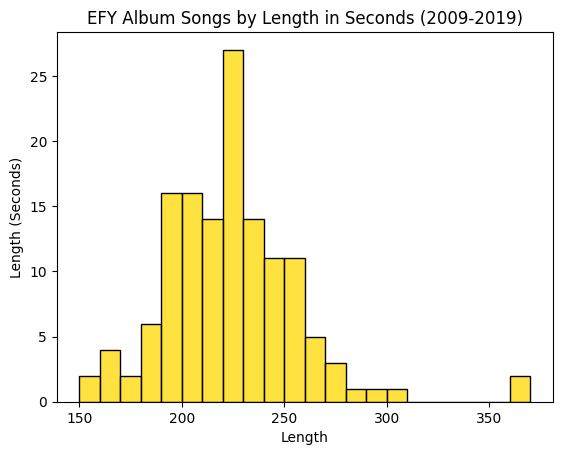

In [17]:
sns.histplot(data = efy, x = "Length", color = "gold", binwidth = 10, binrange = [150, 370])
plt.ylabel("Length (Seconds)")
plt.title("EFY Album Songs by Length in Seconds (2009-2019)");

In [88]:
efy["Length"].mean()

223.5514705882353

In [93]:
efy[efy["Length"] > 320]

,Title,Artist1,Artist2,Artist3,Artist4,Artist5,Artist6,Artist7,Artist8,Artist9,...,Music4,Arrangement1,Arrangement2,Arrangement3,Album,Year,TrackNum,TotalTracks,YouTube,Length
263,I Believe in Christ,Jen Marco Handy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Michael R. Hicks,NaN,NaN,EFY 2009: Be Thou an Example (2009),2009,12,12,https://www.youtube.com/watch?v=8dw3fZ-k0sU,361.0
286,I Know That My Redeemer Lives,Jen Marco Handy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Michael R. Hicks,NaN,NaN,"EFY 2011: Believe, Hope, Endure (2011)",2011,11,13,https://www.youtube.com/watch?v=30kY7giIlqc,369.0


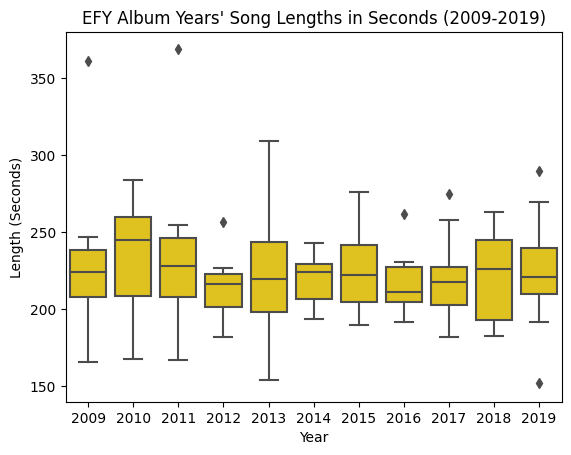

In [18]:
sns.boxplot(data = efy[efy["Year"] > 2008], x = "Year", y = "Length", color = "gold")
plt.ylabel("Length (Seconds)")
plt.ylim([140, 380])
plt.title("EFY Album Years' Song Lengths in Seconds (2009-2019)");

In [107]:
efy[efy["Year"] == 2019]

,Title,Artist1,Artist2,Artist3,Artist4,Artist5,Artist6,Artist7,Artist8,Artist9,...,Music4,Arrangement1,Arrangement2,Arrangement3,Album,Year,TrackNum,TotalTracks,YouTube,Length
376,Trust With All Your Heart,Hannah Eyre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,EFY 2019: Trust With All Thine Heart (2019),2019,1,12,https://www.youtube.com/watch?v=M1wWGaFnHkU,236.0
377,Battle Cry,Logan Shelton,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,EFY 2019: Trust With All Thine Heart (2019),2019,2,12,https://www.youtube.com/watch?v=nlbOJEYt0C8,216.0
378,Right Here,Alyssa Crockett,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,EFY 2019: Trust With All Thine Heart (2019),2019,3,12,https://www.youtube.com/watch?v=CeTaAypVxxc,192.0
379,Answers,Cayson Renshaw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,EFY 2019: Trust With All Thine Heart (2019),2019,4,12,https://www.youtube.com/watch?v=R5YQO9eXs1M,250.0
380,This Is Grace,Amy Geis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,EFY 2019: Trust With All Thine Heart (2019),2019,5,12,https://www.youtube.com/watch?v=YVK9LwQxo00,290.0
381,The Calm,Nik Day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,EFY 2019: Trust With All Thine Heart (2019),2019,6,12,https://www.youtube.com/watch?v=2R6Dc7JJHM0,194.0
382,We Stand,Lauryn Judd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,EFY 2019: Trust With All Thine Heart (2019),2019,7,12,https://www.youtube.com/watch?v=SLw3YpJ5DlE,152.0
383,Faces,Gabrielle McKeon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,EFY 2019: Trust With All Thine Heart (2019),2019,8,12,https://www.youtube.com/watch?v=q7_ush0maMo,215.0
384,He’ll Never Let You Go,Patch Crowe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,EFY 2019: Trust With All Thine Heart (2019),2019,9,12,https://www.youtube.com/watch?v=_LuUgtyyqs8,270.0
385,Count Me In,Josh Dalley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,EFY 2019: Trust With All Thine Heart (2019),2019,10,12,https://www.youtube.com/watch?v=l96DDM35HbQ,217.0


In [118]:
#efy_artist_length = pd.DataFrame(efy_tidy[efy_tidy["Year"] > 2008 & efy_tidy["Artist"] isin efy_tidy_art].groupby("Artist")["Length"].mean()).reset_index()

#plt.scatter(data = efy_artist_length[efy_artist_length["Artist"].isin(limits)], x = "Artist", y = "Length")
#plt.xticks(rotation=87)
#plt.gca().set_ylim([100, 400]);

SyntaxError: invalid syntax. Perhaps you forgot a comma? (110899601.py, line 1)

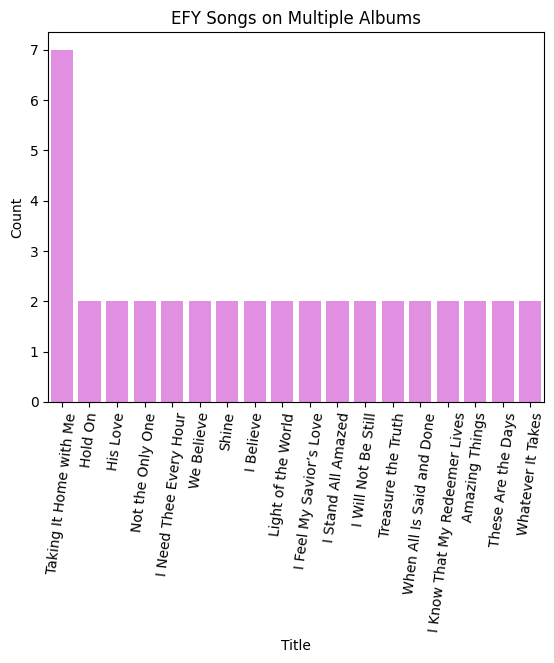

In [145]:
limits = pd.DataFrame(efy["Title"].value_counts() > 1).reset_index()
limits = limits[limits["Title"] == True]["index"]
sns.countplot(data = efy[efy["Title"].isin(limits)], x = "Title", orient = "v", color = "violet", order = limits)
plt.xticks(rotation = 83)
plt.ylabel("Count")
plt.title("EFY Songs on Multiple Albums");

In [144]:
efy[efy["Title"].isin(limits)]

,Title,Artist1,Artist2,Artist3,Artist4,Artist5,Artist6,Artist7,Artist8,Artist9,...,Music4,Arrangement1,Arrangement2,Arrangement3,Album,Year,TrackNum,TotalTracks,YouTube,Length
60,Taking It Home with Me,Barry Gibbons,Lucie Gibbons,Steve James,Wanda Lindstrom,Bryce Neubert,Vickey Pahnke Taylor,Felicia Sorensen Wolfe,NaN,NaN,...,NaN,Merrill Jenson,Steve James,NaN,EFY 1992: Of One Heart (1992),1992,10,10,NaN,NaN
63,Light of the World,Felicia Sorensen Wolfe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Kim Simpson,Staci Peters,Michael Babbitt,EFY 1993: Sharing the Light (1993),1993,3,10,NaN,NaN
69,His Love,Vickey Pahnke Taylor,John Canaan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Tyler Castleton,Merrill Jenson,NaN,EFY 1993: Sharing the Light (1993),1993,9,10,NaN,NaN
70,Taking It Home with Me,Barry Gibbons,Lucie Gibbons,Steve James,Wanda Lindstrom,Bryce Neubert,Vickey Pahnke Taylor,Felicia Sorensen Wolfe,NaN,NaN,...,NaN,Merrill Jenson,Steve James,NaN,EFY 1993: Sharing the Light (1993),1993,10,10,NaN,NaN
82,Taking It Home with Me,Barry Gibbons,Lucie Gibbons,Steve James,Wanda Lindstrom,Bryce Newbert,Vickey Pahnke Taylor,Felicia Sorensen Wolfe,NaN,NaN,...,NaN,NaN,NaN,NaN,EFY 1994: Serving with Strength (1994),1994,12,12,NaN,NaN
94,Taking It Home with Me,Allison Larkin,Jayson Seegmiller,Denise Smith,Priscilla Packard,Elizabeth Wold,Todd Seamons,Cindy Harper,Taylor Anderson,Becky Garrett,...,NaN,NaN,NaN,NaN,EFY 1995: Return with Honor (1995),1995,12,13,NaN,NaN
97,Amazing Things,Julie de Azevedo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,EFY 1996: Living the Legacy (1996),1996,2,11,NaN,NaN
98,Hold On,Greg Simpson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,EFY 1996: Living the Legacy (1996),1996,3,11,NaN,NaN
106,Taking It Home with Me,Peter Breinholt,Rachel de Azevedo,David Brooks,Cast,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,EFY 1996: Living the Legacy (1996),1996,11,11,NaN,NaN
107,Treasure the Truth,Kenneth Cope,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,EFY 1997: Treasure the Truth (1997),1997,1,11,NaN,NaN


In [117]:
efy[efy["Title"] == "Light of the World"]

,ArtistA,ArtistB,Words1,Words2,Words3,Words4,Words5,Music1,Music2,Music3
63,NaN,NaN,Staci Peters,NaN,NaN,NaN,NaN,Staci Peters,NaN,NaN
343,NaN,NaN,Scott Krippayne,Russ Dixon,NaN,NaN,NaN,Scott Krippayne,Russ Dixon,NaN


In [1]:
#efy.dropna(axis = 0, subset = "Arrangement1")

In [5]:
efy[efy["Year"] == 2008]

,Title,Artist1,Artist2,Artist3,Artist4,Artist5,Artist6,Artist7,Artist8,Artist9,...,Music4,Arrangement1,Arrangement2,Arrangement3,Album,Year,TrackNum,TotalTracks,YouTube,Length
235,Steady and Sure,Jessie Clark Funk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Barry Gibbons,B. Michael Gibbons,NaN,"EFY 2008: Steady and Sure (2008, 2008b)",2008,1,17,NaN,NaN
236,Now I Can See,Ben Truman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Jim Funk,Barry Gibbons,NaN,"EFY 2008: Steady and Sure (2008, 2008b)",2008,2,17,NaN,NaN
237,Amazing Grace,Daniel Beck,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Jim Funk,Randy Kartchner,NaN,"EFY 2008: Steady and Sure (2008, 2008b)",2008,3,17,NaN,NaN
238,A Woman’s Heart,Felicia Sorensen Wolfe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Rob Honey,NaN,NaN,"EFY 2008: Steady and Sure (2008, 2008b)",2008,4,17,NaN,NaN
239,The Power of One,Megan Flinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Rich Dixon,NaN,NaN,"EFY 2008: Steady and Sure (2008, 2008b)",2008,5,17,NaN,NaN
240,Great Expectations,Greg Simpson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Todd Sorensen,NaN,NaN,"EFY 2008: Steady and Sure (2008, 2008b)",2008,6,17,NaN,NaN
241,One by One,Hilary Weeks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Todd Sorensen,NaN,NaN,"EFY 2008: Steady and Sure (2008, 2008b)",2008,7,17,NaN,NaN
242,Heaven’s Fountain,Terry White,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Rich Dixon,NaN,NaN,"EFY 2008: Steady and Sure (2008, 2008b)",2008,8,17,NaN,NaN
243,What He Began,Tim Gates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Barry Gibbons,NaN,NaN,"EFY 2008: Steady and Sure (2008, 2008b)",2008,9,17,NaN,NaN
244,Dream Big,Ryan Shupe and the Rubberband,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Ryan Shupe and the Rubberband,NaN,NaN,"EFY 2008: Steady and Sure (2008, 2008b)",2008,10,17,NaN,NaN
